In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [9]:
# 1. Explode the list of skills into separate rows
df_da_us = df_da_us.explode('job_skills')

# 2. Drop rows with missing skills or salary
df_da_us = df_da_us.dropna(subset=['job_skills', 'salary_year_avg'])

# 3. Now group and aggregate
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# 4. Sort for plots
df_da_us_pay = df_da_us_group.sort_values(by='median', ascending=False)
df_da_skills = df_da_us_group.sort_values(by='count', ascending=False)


/tmp/ipykernel_10442/506674640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], palette='Blues_d')
/tmp/ipykernel_10442/506674640.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_da_top_common, x='count', y=df_da_top_common.index, ax=ax[1], palette='Greens_d')


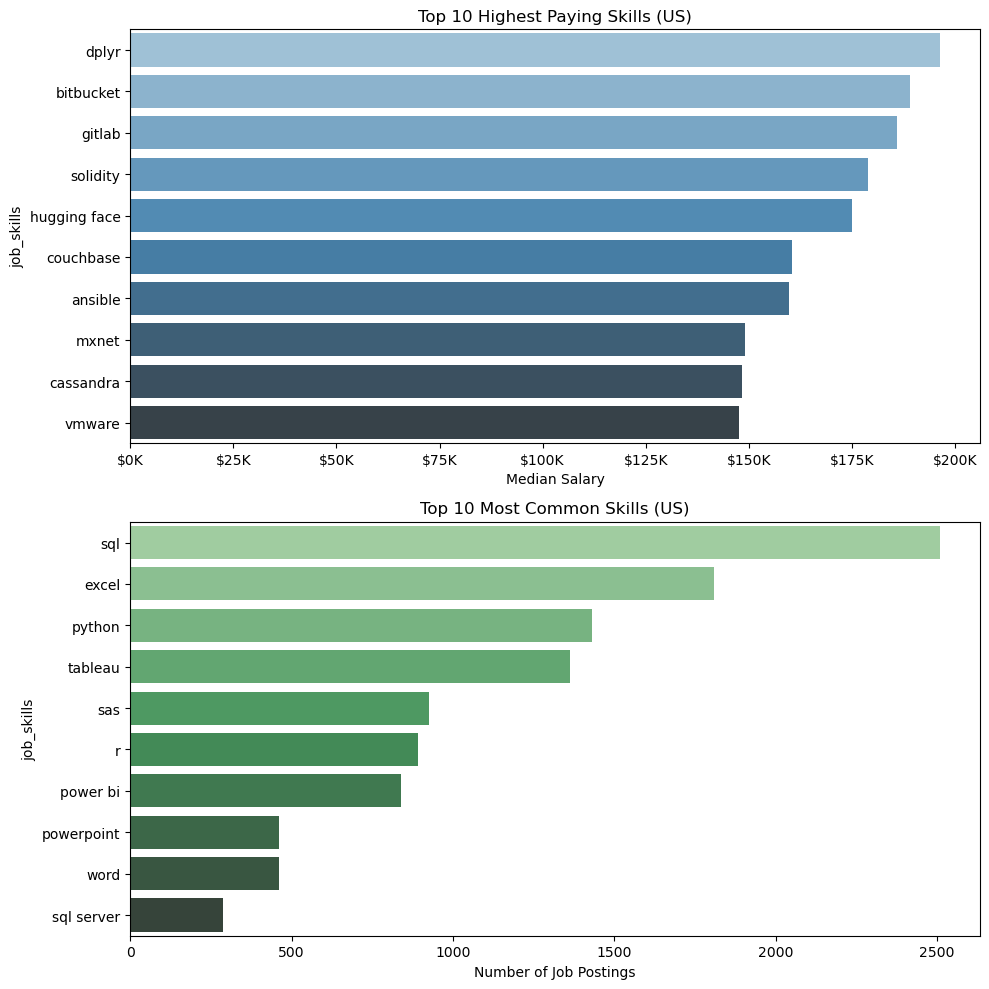

In [18]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# Sort for top 10 highest paying and most common skills
df_da_top_pay = df_da_us_pay.sort_values(by='median', ascending=False).head(10)
df_da_top_common = df_da_skills.sort_values(by='count', ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Top 10 highest paying skills
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, ax=ax[0], palette='Blues_d')
ax[0].set_title('Top 10 Highest Paying Skills (US)')
ax[0].set_xlabel('Median Salary')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# No need to invert_yaxis() now

# Top 10 most common skills
sns.barplot(data=df_da_top_common, x='count', y=df_da_top_common.index, ax=ax[1], palette='Greens_d')
ax[1].set_title('Top 10 Most Common Skills (US)')
ax[1].set_xlabel('Number of Job Postings')

plt.tight_layout()
plt.show()

